In [ ]:
#y" = (y[k + 1] - 2*y[k] + y[k - 1]) / h ** 2
#y' = (y[k + 1] - y[k]) / 2 * h

In [15]:
import numpy as np
import sympy as sp
import mpmath as mp
import math as mt
from matplotlib import pyplot as plt

def plothelper(n : list, a : float,b : float, flg):
    for i in n:
        p = np.array(approximation(i,a,b,flg))
        x,y = p.T
        plt.scatter(x,y)
        plt.plot(x,y,'-o')
    plt.show()
 
def approximation(n : int, a : float,b : float, flg):
    h = (b - a) / (n - 1)
    y,helper = [],[]
    mysin = (lambda x : 1) if not flg else (lambda x : mt.sin(8))
    mycos = (lambda x : 1) if not flg else (lambda x : mt.cos(8))
    tmp = mysin(1) * (sp.Symbol('y2') - 2 * sp.Symbol('y1')) / (h ** 2) + (1 + (mycos(1)) * (a + h) ** 2) * sp.Symbol('y1') / (2*h) + 1
    y.append(tmp)
    for i in range(2,n - 2):
        tmp = mysin(i) * (sp.Symbol('y' + str(i + 1)) - 2 * sp.Symbol('y' + str(i)) + sp.Symbol('y' + str(i - 1))) / (h ** 2) + (1 + mycos(i) * (a + i * h) ** 2) * sp.Symbol('y' + str(i)) + 1 
        y.append(tmp)
    tmp = mysin(n - 2) * (-2 * sp.Symbol('y' + str(n - 2)) + sp.Symbol('y' + str(n - 3))) / (h ** 2) + (1 + mycos(n - 2) * (b - h) ** 2) * sp.Symbol('y' + str(n - 2)) + 1
    y.append(tmp)
    helper = [sp.Symbol('y' + str(i)) for i in range(1,n - 1)]
    mymap = sp.solve(y,helper)
    ans = [mymap[i] for i in mymap]
    dots = []
    for i in range(len(ans)):
        dots.append([((i + 1) * h) + a,ans[i]])
    print(dots)
    print(max(ans))
    return dots

[[-0.7777777777777778, 0.405783908060157], [-0.5555555555555556, 0.689823086287913], [-0.33333333333333337, 0.879900217787111], [-0.11111111111111116, 0.972314785896070], [0.11111111111111116, 0.966738308467169], [0.33333333333333326, 0.863449566874694], [0.5555555555555554, 0.663400903917351], [0.7777777777777777, 0.371097709141544]]
0.972314785896070
[[-0.8947368421052632, 0.192692695592842], [-0.7894736842105263, 0.356044342616600], [-0.6842105263157895, 0.501911716659846], [-0.5789473684210527, 0.628533897378005], [-0.4736842105263158, 0.734777065088705], [-0.368421052631579, 0.819971546470441], [-0.26315789473684215, 0.883766918451457], [-0.1578947368421053, 0.926011380586103], [-0.052631578947368474, 0.946659194112568], [0.05263157894736836, 0.945708320450673], [0.1578947368421053, 0.923169324782255], [0.26315789473684204, 0.879065956520955], [0.36842105263157876, 0.813467373851631], [0.4736842105263157, 0.726551532312928], [0.5789473684210527, 0.618698596145352], [0.684210526315

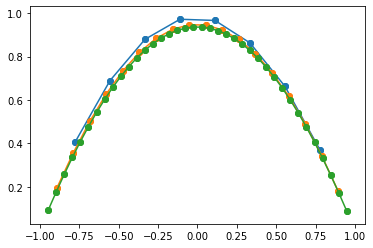

In [16]:
plothelper([10,20,40],-1,1,False)

[[-0.7777777777777778, 0.342255696501141], [-0.5555555555555556, 0.599543261481186], [-0.33333333333333337, 0.778335282826264], [-0.11111111111111116, 0.868991748168543], [0.11111111111111116, 0.866437483907057], [0.33333333333333326, 0.770799754284639], [0.5555555555555554, 0.587396515452314], [0.7777777777777777, 0.326076797320400]]
0.868991748168543
[[-0.8947368421052632, 0.164973622884098], [-0.7894736842105263, 0.310993773587567], [-0.6842105263157895, 0.442647286143499], [-0.5789473684210527, 0.558481524492651], [-0.4736842105263158, 0.657166560536458], [-0.368421052631579, 0.737532413887103], [-0.26315789473684215, 0.798601876526019], [-0.1578947368421053, 0.839617991559100], [-0.052631578947368474, 0.860065387326261], [0.05263157894736836, 0.859684835377888], [0.1578947368421053, 0.838480595993407], [0.26315789473684204, 0.796720329414427], [0.36842105263157876, 0.734927575315058], [0.4736842105263157, 0.653867027287057], [0.5789473684210527, 0.554523043334015], [0.684210526315

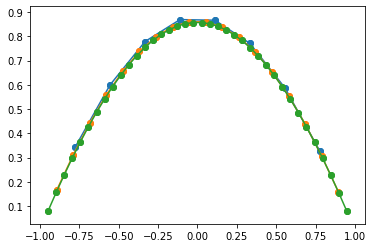

In [11]:
plothelper([10,20,40],-1,1,True)

In [12]:
import numpy as np
import sympy as sp
import mpmath as mp
import math as mt
from matplotlib import pyplot as plt

def plothelper(n : list, a : float,b : float, flg):
    for i in n:
        p = np.array(approximation(i,a,b,flg))
        x,y = p.T
        plt.scatter(x,y)
        plt.plot(x,y,'-o')
    plt.show()

def approximation(n : int, a : float,b : float, flg):
    """if(n <= 2):
        n = 3
    h = (b - a) / (n - 2)
    cur = (b - a) / (n - 1)
    while abs(h - cur) > 10 ** (-3):
        n += 1
        h = cur
        cur = (b - a) / (n - 1)
    h = cur
    """
    h = (b - a) / (n - 1)
    y,helper = [],[]
    mysin = (lambda x : 1) if not flg else (lambda x : mt.sin(8.0 * (a + x * h)))
    mycos = (lambda x : 1) if not flg else (lambda x : mt.cos(8.0 * (a + x * h)))
    tmp = mysin(1) * (sp.Symbol('y2') - 2 * sp.Symbol('y1')) / (h ** 2) + (1 + (mycos(1)) * (a + h) ** 2) * sp.Symbol('y1') / (2*h) + 1
    y.append(tmp)
    for i in range(2,n - 2):
        tmp = mysin(i) * (sp.Symbol('y' + str(i + 1)) - 2 * sp.Symbol('y' + str(i)) + sp.Symbol('y' + str(i - 1))) / (h ** 2) + (1 + mycos(i) * (a + i * h) ** 2) * sp.Symbol('y' + str(i)) + 1 
        y.append(tmp)
    tmp = mysin(n - 2) * (-2 * sp.Symbol('y' + str(n - 2)) + sp.Symbol('y' + str(n - 3))) / (h ** 2) + (1 + mycos(n - 2) * (b - h) ** 2) * sp.Symbol('y' + str(n - 2)) + 1
    y.append(tmp)
    helper = [sp.Symbol('y' + str(i)) for i in range(1,n - 1)]
    mymap = sp.solve(y,helper)
    ans = [mymap[i] for i in mymap]
    dots = []
    for i in range(len(ans)):
        dots.append([((i + 1) * h) + a,ans[i]])
    print(dots)
    print(max(ans))
    return dots

[[-0.9310344827586207, -0.0466655078275181], [-0.8620689655172413, -0.0905050309245150], [-0.7931034482758621, -0.127284057206839], [-0.7241379310344828, -0.102852491594614], [-0.6551724137931034, -0.0870054620613494], [-0.5862068965517242, -0.0760845245809423], [-0.5172413793103449, -0.0695619165630781], [-0.4482758620689655, -0.0683681429817663], [-0.3793103448275862, -0.0776137036664725], [-0.31034482758620685, -0.0453280748509611], [-0.24137931034482762, -0.00559862932509509], [-0.1724137931034483, 0.0391854174103639], [-0.10344827586206895, 0.0890051766657077], [-0.034482758620689724, 0.145863692846921], [0.034482758620689724, 0.222734211359271], [0.10344827586206895, 0.278248877699478], [0.17241379310344818, 0.325493486749614], [0.24137931034482762, 0.366307432362455], [0.31034482758620685, 0.400215395484554], [0.3793103448275863, 0.423481658025719], [0.4482758620689655, 0.386112037505027], [0.5172413793103448, 0.363295748624117], [0.5862068965517242, 0.347904194825077], [0.65517

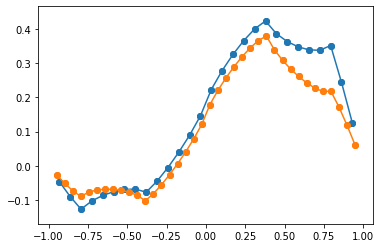

In [14]:
plothelper([30,40],-1,1,True)